In [19]:
import cv2 as cv
import numpy as np
import argparse
import random as rng
import matplotlib.pyplot as plt

In [2]:
def auto_canny(image, sigma=0.33):
    # compute the median of the single channe pixel intensities
    v = np.median(image)

    # apply automatic Canny edge detection using the computed median
    lower = int(max(0, (1.0 - sigma) * v))
    upper = int(min(255, (1.0 + sigma) * v))
    edged = cv.Canny(image, lower, upper)

    # return the edged image
    return edged

In [ ]:
def rectangle_contours(img, thresh, max_thresh):
    threshold = thresh

    canny_output = cv.Canny(img, threshold, threshold * 2)
    #canny_output = auto_canny(img)

    contours, _ = cv.findContours(canny_output, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

    drawing = np.zeros((canny_output.shape[0], canny_output.shape[1], 3), dtype=np.uint8)

    contours_poly = [None]*len(contours)
    boundRect = [None]*len(contours)
    centers = [None]*len(contours)
    radius = [None]*len(contours)

    for i, c in enumerate(contours):
        contours_poly[i] = cv.approxPolyDP(c, 3, True)
        boundRect[i] = cv.boundingRect(contours_poly[i])
        centers[i], radius[i] = cv.minEnclosingCircle(contours_poly[i])
    print(len(contours))

    perimeter = []
    for cntr in contours:
        perimeter.append(cv.arcLength(cntr,True)) # pieza cerrada

    # Select largest:
    largest = max(perimeter)
    print(largest)
    i = perimeter.index(largest)

    # Draw rectangle
    color = (rng.randint(0,256), rng.randint(0,256), rng.randint(0,256))
    #cv.drawContours(drawing, contours_poly, i, color)
    cv.rectangle(drawing, (int(boundRect[i][0]), int(boundRect[i][1])), \
        (int(boundRect[i][0]+boundRect[i][2]), int(boundRect[i][1]+boundRect[i][3])), color, 2)

        #cv.circle(drawing, (int(centers[i][0]), int(centers[i][1])), int(radius[i]), color, 2)
    plt.imshow(drawing)

In [ ]:
src = cv.imread('lata_azul.png')
# Convert image to gray and blur it
src_gray = cv.cvtColor(src, cv.COLOR_BGR2GRAY)
src_gray = cv.blur(src_gray, (3,3))
max_thresh = 255
thresh = 100 # initial threshold
rectangle_contours(src_gray, thresh, max_thresh)


## **Revisión de auto_canny()**

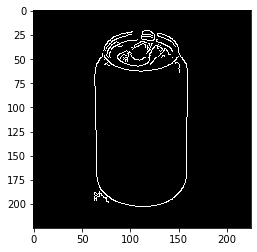

In [18]:
img_path = '/home/mariana/Documents/TopicosAvanzadosIA/Proyecto/images/lata_prueba.jpeg'
img = cv.imread(img_path, cv.IMREAD_GRAYSCALE)
img2c = cv.cvtColor(img, cv.COLOR_GRAY2RGB)
newedge = auto_canny(img2c, sigma=-2)
newedge = cv.cvtColor(newedge, cv.COLOR_GRAY2RGB)
plt.imshow(newedge)

# **Rectangulo y AutoCanny**

In [22]:
def rectangle_contours_autocanny(img_path, thresh, max_thresh, sigma=0.01):
    threshold = thresh

    #canny_output = cv.Canny(img, threshold, threshold * 2)
    #canny_output = auto_canny(img)
    img = cv.imread(img_path, cv.IMREAD_GRAYSCALE)
    #plt.imshow(img)
    img2c = cv.cvtColor(img, cv.COLOR_GRAY2RGB)
    canny_output = auto_canny(img2c, sigma=sigma)


    contours, _ = cv.findContours(canny_output, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

    drawing = np.zeros((canny_output.shape[0], canny_output.shape[1], 3), dtype=np.uint8)

    contours_poly = [None]*len(contours)
    boundRect = [None]*len(contours)
    centers = [None]*len(contours)
    radius = [None]*len(contours)

    for i, c in enumerate(contours):
        contours_poly[i] = cv.approxPolyDP(c, 3, True)
        boundRect[i] = cv.boundingRect(contours_poly[i])
        centers[i], radius[i] = cv.minEnclosingCircle(contours_poly[i])
    print(len(contours))

    perimeter = []
    for cntr in contours:
        perimeter.append(cv.arcLength(cntr,True)) # pieza cerrada

    # Select largest:
    largest = max(perimeter)
    print(largest)
    i = perimeter.index(largest)

    # Draw rectangle
    color = (rng.randint(0,256), rng.randint(0,256), rng.randint(0,256))
    #cv.drawContours(drawing, contours_poly, i, color)
    x1 = int(boundRect[i][0])
    y1 = int(boundRect[i][1])
    x2 = int(boundRect[i][0]+boundRect[i][2])
    y2 = int(boundRect[i][1]+boundRect[i][3])
    x1_y1 = (x1, y1) # tuple (x1, y1)
    x2_y2 = (x2, y2)
    cv.rectangle(drawing, x1_y1, x2_y2, color, 3)

    center = ((x1 + x2)//2, (y1 + y2)//2)

    #cv.circle(drawing, (int(centers[i][0]), int(centers[i][1])), int(radius[i]), color, 2)
    cv.circle(drawing, center, radius=1, color=(0, 0, 255), thickness=2)
    plt.imshow(drawing)
    #print(x1_y1, x2_y2)
    return center

13
1211.1513639688492


(111, 114)

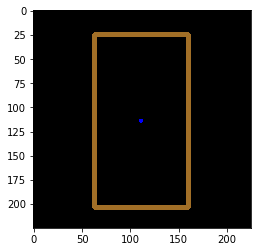

In [23]:
src = '../images/lata_prueba.jpeg'
# Convert image to gray and blur it
#src_gray = cv.cvtColor(src, cv.COLOR_BGR2GRAY)
#src_gray = cv.blur(src_gray, (3,3))
max_thresh = 255
thresh = 100 # initial threshold
rectangle_contours_autocanny(src,thresh, max_thresh, sigma=-3)

## **Line and autocany**

In [20]:
def line_contours_autocanny(img_path, thresh, max_thresh, sigma=0.01):
    threshold = thresh

    #canny_output = cv.Canny(img, threshold, threshold * 2)
    #canny_output = auto_canny(img)
    img = cv.imread(img_path, cv.IMREAD_GRAYSCALE)
    #plt.imshow(img)
    img2c = cv.cvtColor(img, cv.COLOR_GRAY2RGB)
    canny_output = auto_canny(img2c, sigma=sigma)


    contours, _ = cv.findContours(canny_output, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

    drawing = np.zeros((canny_output.shape[0], canny_output.shape[1], 3), dtype=np.uint8)

    contours_poly = [None]*len(contours)
    boundRect = [None]*len(contours)
    centers = [None]*len(contours)
    radius = [None]*len(contours)

    for i, c in enumerate(contours):
        contours_poly[i] = cv.approxPolyDP(c, 3, True)
        boundRect[i] = cv.boundingRect(contours_poly[i])
        centers[i], radius[i] = cv.minEnclosingCircle(contours_poly[i])
    print(len(contours))

    perimeter = []
    for cntr in contours:
        perimeter.append(cv.arcLength(cntr,True)) # pieza cerrada

    # Select largest:
    largest = max(perimeter)
    print(largest)
    i = perimeter.index(largest)

    # Draw rectangle
    color = (rng.randint(0,256), rng.randint(0,256), rng.randint(0,256))
    #cv.drawContours(drawing, contours_poly, i, color)
    x1 = int(boundRect[i][0])
    y1 = int(boundRect[i][1])
    x2 = int(boundRect[i][0]+boundRect[i][2])
    y2 = int(boundRect[i][1]+boundRect[i][3])
    x1_y1 = (x1, y1) # tuple (x1, y1)
    x2_y2 = (x2, y2)
    cv.line(drawing, x1_y1, x2_y2, color, 2)

    center = ((x1 + x2)//2, (y1 + y2)//2)

    #cv.circle(drawing, (int(centers[i][0]), int(centers[i][1])), int(radius[i]), color, 2)
    cv.circle(drawing, center, radius=1, color=(255, 255, 255), thickness=5)
    plt.imshow(drawing)
    #print(x1_y1, x2_y2)
    return center

17
1211.1513639688492


(111, 114)

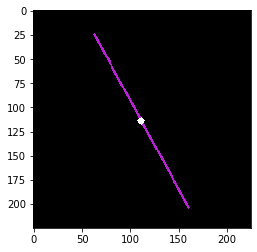

In [21]:
src = '../images/lata_prueba.jpeg'
# Convert image to gray and blur it
#src_gray = cv.cvtColor(src, cv.COLOR_BGR2GRAY)
#src_gray = cv.blur(src_gray, (3,3))
max_thresh = 255
thresh = 100 # initial threshold
line_contours_autocanny(src,thresh, max_thresh, sigma=-2)